## folger pinnacle jul-aug 2021 hypoxic event

In [6]:
import pandas as pd
import onc
import os
from functools import reduce
import json
from typing import List, Tuple
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import helpers_hypoxic as hh
from helpers_hypoxic import units
from matplotlib.ticker import MultipleLocator

from functools import reduce

#token = os.environ["TRICY_TOKEN"]
from dotenv import load_dotenv
load_dotenv()
token = os.getenv("ONC_TOKEN")

# Create ONC client
my_onc = onc.ONC(token)

Defining Hypoxia

"In ocean and freshwater environments, the term "hypoxia" refers to low or depleted oxygen in a water body." - https://oceanservice.noaa.gov/hazards/hypoxia/#:~:text=Graphic%20credit%3A%20Louisiana%20Universities%20Marine,oxygen%20in%20a%20water%20body.

"low levels of dissolved oxygen (less than 2-3 milligrams of oxygen per liter of water)" - https://www.epa.gov/ms-htf/hypoxia-101 



Effects of Hypoxia

- Deadzones
- 

Key Inidicators of Hypoxia

1. Oxygen Concentration and Saturation


2. Chloropyll
3. PAR (Photosynthetically Active Radiation)
4. Turbidity
5. Temperature
6. Salinity
7. Apparent Oxygen Utilization

In [7]:
# dates of interest: July through August 2021
# specifically Jul 8 - Aug 11
dateFrom = "2021-07-15T00:00:00.000Z"
dateTo = "2021-07-17T00:00:00.000Z"

In [8]:
# populate dataframes for each indicator
sal_df = hh.get_property(start=dateFrom, end=dateTo, locationCode="FGPPN", deviceCategoryCode="CTD", propertyCode="salinity")
temp_df = hh.get_property(start=dateFrom, end=dateTo, locationCode="FGPPN", deviceCategoryCode="CTD", propertyCode="seawatertemperature")
ox_df = hh.get_property(start=dateFrom, end=dateTo, locationCode="FGPPN", deviceCategoryCode="OXYSENSOR", propertyCode="oxygen")
par_df = hh.get_property(start=dateFrom, end=dateTo, locationCode="FGPPN", deviceCategoryCode="radiometer", propertyCode="parphotonbased")
chlo_df = hh.get_property(start=dateFrom, end=dateTo, locationCode="FGPPN", deviceCategoryCode="FLNTU", propertyCode="chlorophyll")
tur_df = hh.get_property(start=dateFrom, end=dateTo, locationCode="FGPPN", deviceCategoryCode="FLNTU", propertyCode="turbidityntu")

indicators = [sal_df, temp_df, ox_df, par_df, chlo_df, tur_df]

# merge dataframes of all indicators
merged_indicators = hh.merge_on_timestamp(to_merge=indicators)
print(merged_indicators.columns.tolist())


['timestamp', 'salinity', 'seawatertemperature', 'oxygen', 'parphotonbased', 'chlorophyll', 'turbidityntu']


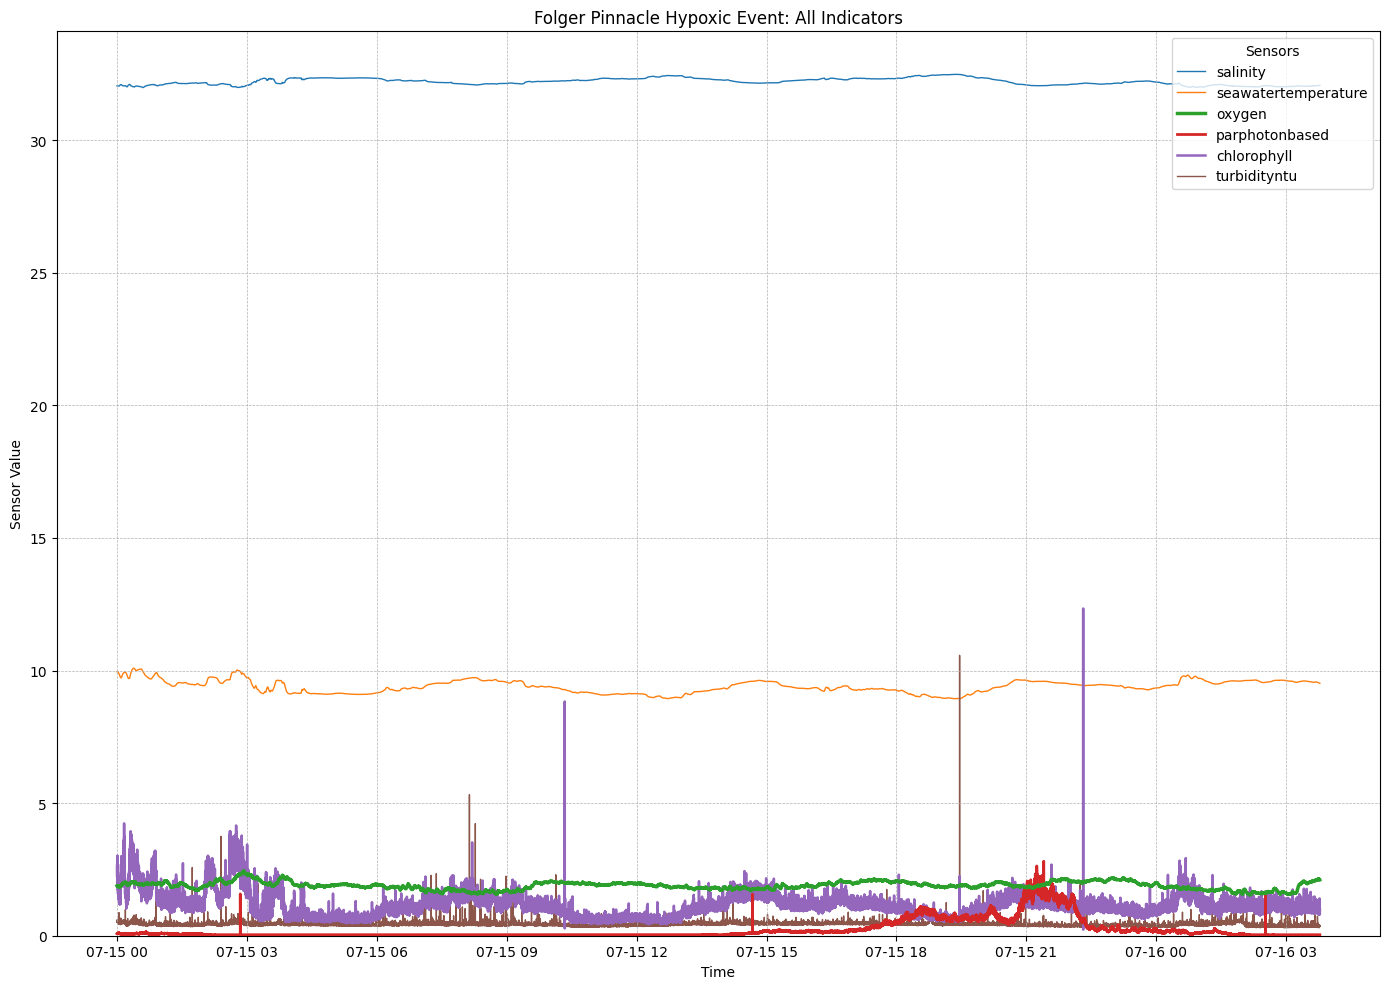

In [9]:
# plot all indicators
hh.plot_all_sensors(df=merged_indicators, title="Folger Pinnacle Hypoxic Event: All Indicators")

In [ ]:
# plot all indicators
hh.plot_all_sensors(df=merged_indicators, title="Folger Pinnacle Hypoxic Event: Scaled", ymax=5)